Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading data

In [2]:
data = pd.read_csv('car.data')
print(data[:-10])

     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1713    low    low  5more       4      med    low  unacc
1714    low    low  5more       4      med    med   good
1715    low    low  5more       4      med   high  vgood
1716    low    low  5more       4      big    low  unacc
1717    low    low  5more       4      big    med   good

[1718 rows x 7 columns]


Encoding the Features

In [3]:
# i'm using a dictionary to map the values to numbers
buying = {
    'low': 0,
    'med': 1,
    'high': 2,
    'vhigh': 3
}
maint = {
    'low': 0,
    'med': 1,
    'high': 2,
    'vhigh': 3
}
doors = {
    '2': 2,
    '3': 3,
    '4':4,
    '5more': 5
}
persons = {
    '2': 2,
    '4': 4,
    'more': 5
}
lug_boot = {
    'small': 0,
    'med': 1,
    'big': 2
}
safety = {
    'low': 0,
    'med': 1,
    'high': 2
}
class_dic = {
    'unacc': 0,
    'acc': 1,
    'good': 2,
    'vgood': 3 
}
data = data.replace({ 'buying': buying, 'maint': maint, 'doors': doors, 'persons': persons, 'lug_boot': lug_boot, 'safety': safety, 'class': class_dic})
print(data[:-10])

      buying  maint  doors  persons  lug_boot  safety  class
0          3      3      2        2         0       0      0
1          3      3      2        2         0       1      0
2          3      3      2        2         0       2      0
3          3      3      2        2         1       0      0
4          3      3      2        2         1       1      0
...      ...    ...    ...      ...       ...     ...    ...
1713       0      0      5        4         1       0      0
1714       0      0      5        4         1       1      2
1715       0      0      5        4         1       2      3
1716       0      0      5        4         2       0      0
1717       0      0      5        4         2       1      2

[1718 rows x 7 columns]


Visualizing Which features affect the class the most

(1728, 4)


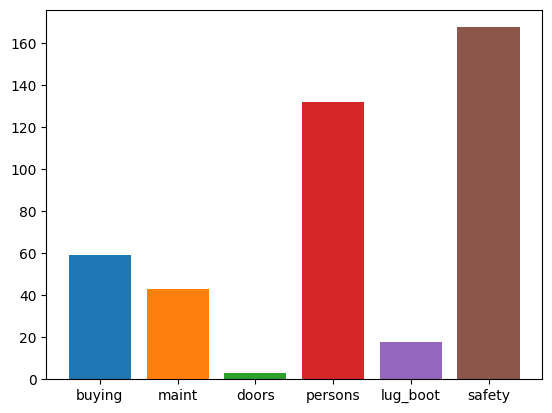

In [4]:
Y = data['class']
X = data.drop(['class'], axis=1)
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(f_classif,k=4)
X_new = selector.fit_transform(X,Y)
print(X_new.shape)
for i,j in zip(X.columns,selector.scores_):
    plt.bar(i,j)
plt.show()

In [5]:
print(selector.get_support())
features = X.columns[selector.get_support()].values
print(features)

[ True  True False  True False  True]
['buying' 'maint' 'persons' 'safety']


Splitting the data into training , validation and testing sets

In [6]:
X = X.values
Y = Y.values
print(X.shape, Y.shape)
from sklearn.model_selection import train_test_split
X_,X_test,y_,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_,y_,test_size=0.3,random_state=42)
print(X_train.shape,X_val.shape,X_test.shape)

(1728, 6) (1728,)
(967, 6) (415, 6) (346, 6)


Choosing the best hyperparameters

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
params = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(model, params,scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


KNN Model

In [8]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'], weights=grid.best_params_['weights'], metric=grid.best_params_['metric'])
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
print(f'Val Accuracy: {accuracy_score(y_val,y_pred)}')
prediction = model.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test,prediction)}')

Val Accuracy: 0.9421686746987952
Test Accuracy: 0.9393063583815029


Checking wrong predictions

In [9]:
wrong = np.where(y_test != prediction)
print(f'Wrong Prediction Positions: {wrong}')
print(y_test[wrong[0][0]], prediction[wrong[0][0]])#cause it's a tuple
print(y_test[wrong[0][-1]], prediction[wrong[0][-1]])
# convert the class_dic back to the original values
class_dic = {
    0: 'unacc',
    1: 'acc',
    2: 'good',
    3: 'vgood' 
}
print(class_dic[y_test[wrong[0][0]]], class_dic[prediction[wrong[0][0]]])
print(class_dic[y_test[wrong[0][-1]]], class_dic[prediction[wrong[0][-1]]])

Wrong Prediction Positions: (array([  1,  10,  35,  44,  45,  75,  88, 104, 106, 121, 126, 132, 142,
       197, 209, 219, 220, 223, 278, 302, 310], dtype=int64),)
1 0
3 1
acc unacc
vgood acc


In [25]:
index = np.random.randint(0, len(y_test))
print(f'Predicted value: {prediction[index]} , Actual value: {y_test[index]}')
print(f'Predicted value: {class_dic[prediction[index]]},   Actual value: {class_dic[y_test[index]]}')

Predicted value: 3 , Actual value: 3
Predicted value: vgood,   Actual value: vgood
